# FlowDenoising User Manual

FlowDenoising is a low-pass filtering tool for volumetric data. A 1D Gaussian filter is applied to each dimension Z, Y and X (in this order), resulting in a 3D filtering. Unlike classical Gaussian filtering, the 2D slices are aligned to minimize the smoothing of the structured recognized by the Optical Flow (OF) estimator.

## Installing the required packages

In [11]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 40 kB 25 kB/s             


## Download a (small) stack
This example uses a 32x256x256 (Z, Y, X) crop of the [EMPIAR-10311](https://www.ebi.ac.uk/empiar/EMPIAR-10310/) volume.

In [12]:
FILEID = "1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB"
FILENAME = "stack.mrc"
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O {FILENAME}

--2022-06-12 20:36:55--  https://docs.google.com/uc?export=download&id=1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo docs.google.com (docs.google.com)... 2a00:1450:4003:80d::200e, 142.250.200.78
Conectando con docs.google.com (docs.google.com)[2a00:1450:4003:80d::200e]:443... conectado.
Petición HTTP enviada, esperando respuesta... 303 See Other
Localización: https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tldi56jnirn3rmi04lo0it77mh3ot8cu/1655058975000/01084993768099894447/*/1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB?e=download [siguiendo]
Aviso: no se admiten comodines en HTTP.
--2022-06-12 20:36:58--  https://doc-0s-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tldi56jnirn3rmi04lo0it77mh3ot8cu/1655058975000/01084993768099894447/*/1jYL6FEMeWGXO0KYlCb9udrICc2qaZLHB?e=download
Resolviendo doc-0s-8s-docs.googleusercontent.com (doc-0s-8s-docs.googleusercontent.com)

## Filtering (using default parameters)

### The default parameters are:

In [14]:
!python ../flowdenoising.py -h

usage: flowdenoising.py [-h] [-i INPUT] [-o OUTPUT] [-s SIGMA] [-l LEVELS]
                        [-w WINSIDE] [-v VERBOSITY] [-n]

3D Gaussian filtering controlled by the optical flow.

options:
  -h, --help            show this help message and exit
  -i INPUT, --input INPUT
                        Input a MRC-file or a multi-image TIFF-file (default:
                        ./stack.tif)
  -o OUTPUT, --output OUTPUT
                        Output a MRC-file or a multi-image TIFF-file (default:
                        ./filtered_stack.tif)
  -s SIGMA, --sigma SIGMA
                        Gaussian sigma (default: 2.0)
  -l LEVELS, --levels LEVELS
                        Number of levels of the Gaussian pyramid used by the
                        optical flow estimator (default: 3)
  -w WINSIDE, --winside WINSIDE
                        Side of the window used by the optical flow estimator
                        (default: 5)
  -v VERBOSITY, --verbosity VERBOSITY
                     

### Filtering

In [16]:
!python ../flowdenoising.py

In [18]:
!ls -l *.mrc

-rw-r--r-- 1 vruiz vruiz 8389632 jun 11 19:57 EMPIAR-10311_32x256x256_float32.mrc
-rw-r--r-- 1 vruiz vruiz 8389632 jun 11 23:13 filtered_stack2.mrc
-rw-r--r-- 1 vruiz vruiz 8389632 jun 12 14:06 filtered_stack.mrc
-rw-r--r-- 1 vruiz vruiz 8389632 jun 12 20:37 stack.mrc


## Filtering (using TIFF output)

In [19]:
!python ../flowdenoising.py -o filtered_stack.tif

In [20]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 8394398 jun 12 20:42 filtered_stack.tif
-rw-r--r-- 1 vruiz vruiz 8393171 jun 11 18:51 stack.tif


## Filtering (without OF compensation)

In [21]:
!python ../flowdenoising.py --no_OF -o no_OF_filtered_stack.tif

In [22]:
!ls -l *.tif

-rw-r--r-- 1 vruiz vruiz 8394398 jun 12 20:42 filtered_stack.tif
-rw-r--r-- 1 vruiz vruiz 8394398 jun 12 20:44 no_OF_filtered_stack.tif
-rw-r--r-- 1 vruiz vruiz 8393171 jun 11 18:51 stack.tif


## Let's see the effect

In [33]:
import skimage.io
import mrcfile
stack_MRC = mrcfile.open("stack.mrc")
stack = stack_MRC.data
filtered_stack = skimage.io.imread("filtered_stack.tif", plugin="tifffile")
no_OF_filtered_stack = skimage.io.imread("no_OF_filtered_stack.tif", plugin="tifffile")

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<IPython.core.display.Math object>

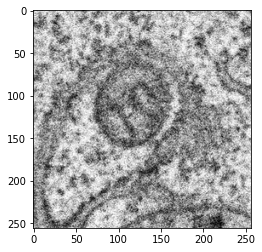

In [47]:
from IPython.display import display, Math
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(stack[15], cmap="gray")

<IPython.core.display.Math object>

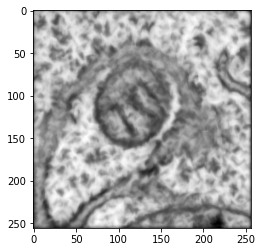

In [48]:
display(Math("\mathtt{Filtered~slice~using~OF~}(\sigma=2):"))
imgplot = plt.imshow(filtered_stack[15], cmap="gray")

<IPython.core.display.Math object>

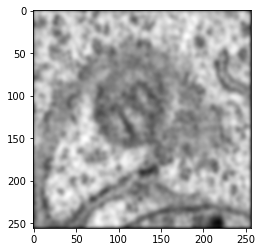

In [50]:
display(Math("\mathtt{Filtered~slice~using~standard~Gaussian~filtering~}(\sigma=2):"))
imgplot = plt.imshow(no_OF_filtered_stack[15], cmap="gray")

## Download a (larger) stack

In [51]:
FILEID = "1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_"
FILENAME = "larger_stack.mrc"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILEID}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={FILEID}" -O {FILENAME} && rm -rf /tmp/cookies.txt
#!mv /tmp/stack.mrc .

--2022-06-12 22:42:13--  https://docs.google.com/uc?export=download&confirm=t&id=1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_
Cargado certificado CA '/etc/ssl/certs/ca-certificates.crt'
Resolviendo docs.google.com (docs.google.com)... 2a00:1450:4003:811::200e, 142.250.201.78
Conectando con docs.google.com (docs.google.com)[2a00:1450:4003:811::200e]:443... conectado.
Petición HTTP enviada, esperando respuesta... 303 See Other
Localización: https://doc-08-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3696hu64najc83cprskqm5226s9obsd2/1655066475000/01084993768099894447/*/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_?e=download [siguiendo]
Aviso: no se admiten comodines en HTTP.
--2022-06-12 22:42:14--  https://doc-08-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3696hu64najc83cprskqm5226s9obsd2/1655066475000/01084993768099894447/*/1lSFb4VZ5iqR3kLdPv1dDbdOe9dKPZ--_?e=download
Resolviendo doc-08-8s-docs.googleusercontent.com (doc-08-8s-docs.googleuserco

In [55]:
stack_MRC = mrcfile.open("larger_stack.mrc")
stack = stack_MRC.data
print("(Z_size, Y_size, X_size) =", stack.shape)

(Z_size, Y_size, X_size) = (100, 1024, 1024)


## Filtering (using MRC output)

In [58]:
!python ../flowdenoising.py --input larger_stack.mrc --output filtered_larger_stack.mrc

## Filtering (without OF compensation)

In [59]:
!python ../flowdenoising.py --no_OF --input larger_stack.mrc --output no_OF_filtered_larger_stack.mrc

## The effect

In [60]:
filtered_stack_MRC = mrcfile.open("filtered_larger_stack.mrc")
filtered_stack = filtered_stack_MRC.data
no_OF_filtered_stack_MRC = mrcfile.open("no_OF_filtered_larger_stack.mrc")
no_OF_filtered_stack = no_OF_filtered_stack_MRC.data

<IPython.core.display.Math object>

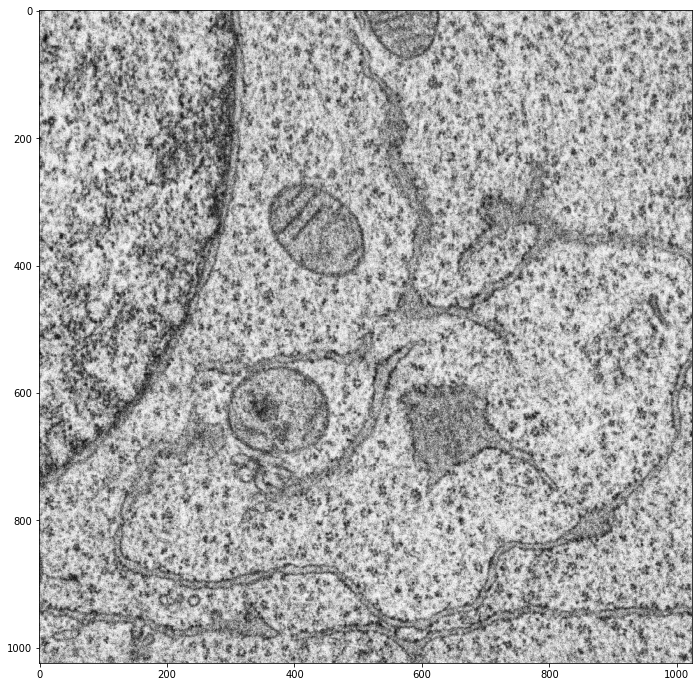

In [70]:
from matplotlib.pyplot import figure
figure(figsize=(12, 12))
display(Math("\mathtt{Original~slice}:"))
imgplot = plt.imshow(stack[stack.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

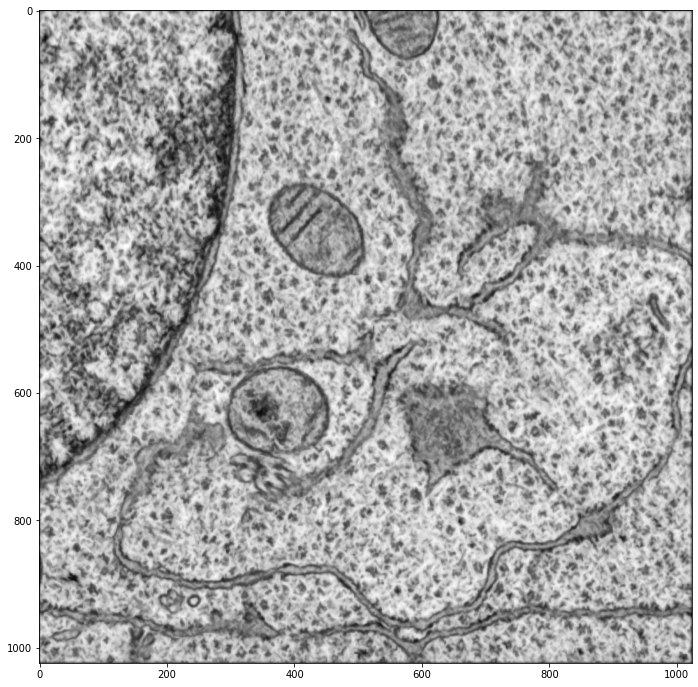

In [71]:
display(Math("\mathtt{Filtered~slice~using~OF}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(filtered_stack[stack.shape[0]//2], cmap="gray")

<IPython.core.display.Math object>

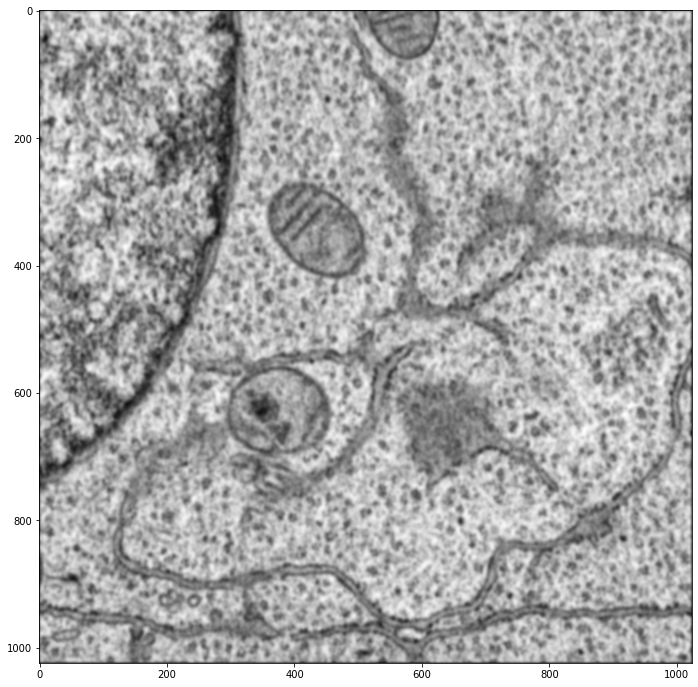

In [72]:
display(Math("\mathtt{Filtered~slice~using~standard~Gaussian~filtering}~(\sigma=2):"))
figure(figsize=(12, 12))
imgplot = plt.imshow(no_OF_filtered_stack[stack.shape[0]//2], cmap="gray")